# Deep Neural Network - CIC2018

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout

In [4]:
data = pd.read_csv("undersampled_cic.csv")
data.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,protocol__0,protocol__6,protocol__17,target
0,551,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,0,3
1,112638867,3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,5.631943e+07,1679.378605,56320621.0,56318246.0,1,0,0,3
2,8966,3,4,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,0,5
3,111816159,17,23,2872.0,1709.0,1460.0,0.0,168.941176,474.948217,428.0,...,578105.0,63064.0,9.999056e+06,23491.769152,10014914.0,9952970.0,0,1,0,0
4,369756,22,22,1976.0,2665.0,640.0,0.0,89.818182,138.033687,976.0,...,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0,1,0,1


## Binary Classification

Assingning training and testing data

In [4]:
X_train = train_data.drop(["bin_target","fiv_target"],axis=1).values
y_train = train_data["bin_target"].values

X_test = test_data.drop(["bin_target","fiv_target"],axis=1).values
y_test = test_data["bin_target"].values

Data Preprocessing - Scaling

In [5]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

Model Construction

In [6]:
model = Sequential()

model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Metal device set to: Apple M1


2021-08-10 10:45:42.076632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-10 10:45:42.076705: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.fit(x = X_train, y = y_train, epochs = 25, batch_size = 256, verbose = 1, validation_data = (X_test,y_test))

Epoch 1/25


2021-08-10 10:45:42.166212: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-10 10:45:42.166373: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-08-10 10:45:42.304975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


486/493 [============================>.] - ETA: 0s - loss: 0.0826

2021-08-10 10:45:45.393901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


493/493 [==============================] - 5s 9ms/step - loss: 0.0821 - val_loss: 0.0351
Epoch 2/25
493/493 [==============================] - 4s 9ms/step - loss: 0.0312 - val_loss: 0.0252
Epoch 3/25
493/493 [==============================] - 4s 9ms/step - loss: 0.0231 - val_loss: 0.0219
Epoch 4/25
493/493 [==============================] - 4s 9ms/step - loss: 0.0180 - val_loss: 0.0158
Epoch 5/25
493/493 [==============================] - 4s 9ms/step - loss: 0.0156 - val_loss: 0.0130
Epoch 6/25
493/493 [==============================] - 4s 9ms/step - loss: 0.0145 - val_loss: 0.0153
Epoch 7/25
493/493 [==============================] - 4s 9ms/step - loss: 0.0135 - val_loss: 0.0120
Epoch 8/25
493/493 [==============================] - 4s 9ms/step - loss: 0.0120 - val_loss: 0.0124
Epoch 9/25
493/493 [==============================] - 4s 9ms/step - loss: 0.0113 - val_loss: 0.0091
Epoch 10/25
493/493 [==============================] - 4s 9ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 11/2

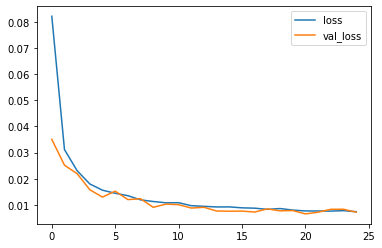

In [8]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

In [9]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

2021-08-10 10:48:02.080761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67343
           1       1.00      1.00      1.00     58630

    accuracy                           1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973



In [11]:
print(confusion_matrix(y_test,y_pred))

[[67135   208]
 [  150 58480]]


## Multiclass Classification

Assingning training and testing data

In [32]:
X = data.drop("target",axis=1).values
y = data["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = data["target"])

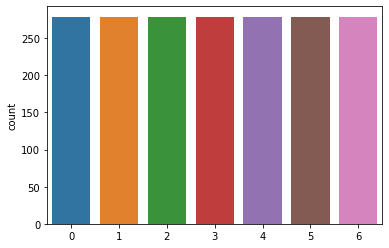

In [42]:
#sns.countplot(x =pd.Series(y_test))
sns.countplot(x =pd.Series(y_test))
plt.show()

In [10]:
# One hot encode the y values 
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

# Scale X values 
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [11]:
model = Sequential()

model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))

model.add(Dense(y_train.shape[1], activation = 'sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

Metal device set to: Apple M1


2021-08-16 20:48:22.890050: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-16 20:48:22.891070: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.fit(x = X_train, y = y_train, epochs = 25, batch_size = 256, verbose = 1, validation_data = (X_test,y_test))

2021-08-16 20:48:25.127857: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-16 20:48:25.133112: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-08-16 20:48:25.304372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/25
18/18 [==============================] - 1s 14ms/step - loss: 1.8317 - val_loss: 1.6481
Epoch 2/25
15/18 [========================>.....] - ETA: 0s - loss: 1.4302

2021-08-16 20:48:25.736066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 10ms/step - loss: 1.3795 - val_loss: 1.0681
Epoch 3/25
18/18 [==============================] - 0s 10ms/step - loss: 0.9552 - val_loss: 0.7802
Epoch 4/25
18/18 [==============================] - 0s 10ms/step - loss: 0.7349 - val_loss: 0.6241
Epoch 5/25
18/18 [==============================] - 0s 10ms/step - loss: 0.5953 - val_loss: 0.5252
Epoch 6/25
18/18 [==============================] - 0s 10ms/step - loss: 0.5254 - val_loss: 0.4702
Epoch 7/25
18/18 [==============================] - 0s 10ms/step - loss: 0.4898 - val_loss: 0.4375
Epoch 8/25
18/18 [==============================] - 0s 10ms/step - loss: 0.4653 - val_loss: 0.4292
Epoch 9/25
18/18 [==============================] - 0s 10ms/step - loss: 0.4404 - val_loss: 0.3946
Epoch 10/25
18/18 [==============================] - 0s 10ms/step - loss: 0.4282 - val_loss: 0.3912
Epoch 11/25
18/18 [==============================] - 0s 10ms/step - loss: 0.4261 - val_loss: 0.3793
Epoch 12/25
18/18 [

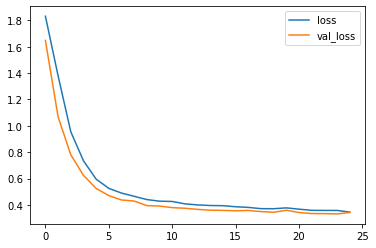

In [13]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

In [14]:
predictions = np.argmax(model.predict(X_test), axis=-1)
predictions

2021-08-16 20:48:38.132869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([6, 4, 1, ..., 4, 0, 2])

In [15]:
y_compare = np.argmax(y_test,axis=1)

In [19]:
print(classification_report(y_compare, predictions))

              precision    recall  f1-score   support

           0       0.60      0.41      0.49       272
           1       1.00      1.00      1.00       285
           2       0.99      1.00      1.00       288
           3       0.79      0.88      0.83       247
           4       0.55      0.64      0.59       269
           5       0.89      0.93      0.91       289
           6       1.00      1.00      1.00       298

    accuracy                           0.84      1948
   macro avg       0.83      0.84      0.83      1948
weighted avg       0.84      0.84      0.84      1948



In [43]:
print(confusion_matrix(y_compare, predictions))

[[112   0   1  25 130   4   0]
 [  0 285   0   0   0   0   0]
 [  0   0 288   0   0   0   0]
 [  2   0   0 217   1  27   0]
 [ 72   0   1  23 171   1   1]
 [  1   0   0  11   8 269   0]
 [  1   0   0   0   0   0 297]]


<AxesSubplot:>

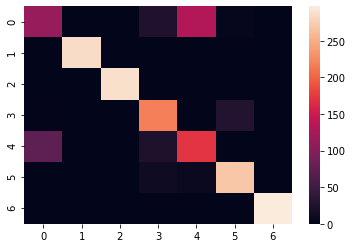

In [44]:
sns.heatmap(confusion_matrix(y_compare, predictions))